# Task #1 

A template code for training an RBM on H$_2$ data for $r = 1.2$ is shown here. Modify this!

Imports and loading in data:

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

from RBM_helper import RBM

import H2_energy_calculator

# # training_data = torch.from_numpy(np.loadtxt("H2_data/R_1.2_samples.txt"))
training_data = torch.from_numpy(np.loadtxt("H2_data/R_1.2_samples.txt"))
coeff = np.loadtxt("H2_data/H2_coefficients.txt")[20,:]

true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
print("H2 energy for r = 1.2: ",true_energy)
print(type(training_data))



H2 energy for r = 1.2:  -1.0642022250418146
<class 'torch.Tensor'>


Define the RBM:

In [2]:
n_vis = 2
n_hin = 10

rbm = RBM(n_vis, n_hin)

Train the RBM:

In [3]:
def train_RBM( training_data): 
    
    epochs = 500 # number of training steps
    num_samples = 1000 # number of samples to generate from the RBM to calculate the H2 energy

    true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
    print("True energy: ",true_energy)

    for e in range(1, epochs+1):
        # do one epoch of training
        rbm.train(training_data)   

        # now generate samples and calculate the energy
        if e % 100 == 0:
#             print("\nEpoch: ", e)
#             print("Sampling the RBM...")

            # For sampling the RBM, we need to do Gibbs sampling.
            # Initialize the Gibbs sampling chain with init_state as defined below.
            init_state = torch.zeros(num_samples, n_vis)
            RBM_samples = rbm.draw_samples(15, init_state)

#             print("Done sampling. Calculating energy...")       

            energies = H2_energy_calculator.energy(RBM_samples, coeff, rbm.wavefunction) 
#             print("Energy from RBM samples: ", energies.item())
    return energies.item()

In [4]:
# 
# load R_<r_value_samples.txt from H2_data folder
# 
# evaluate true_energy on each training data, use it to plot E_bond(r)

Ebond = {}
directory = 'H2_data'
for entry in os.scandir(directory):
    if (entry.path.endswith("samples.txt")):
        training_data = torch.from_numpy(np.loadtxt(entry))
        radius = entry.name.split("_")[1]
        Ebond[radius] = train_RBM(training_data)
#         print(Ebond)

True energy:  -1.0497107493775149
True energy:  -1.0324782127249015
True energy:  -1.0362617443402724
True energy:  -0.9724744744994698
True energy:  -1.0272612255781348
True energy:  -1.0638310134297058
True energy:  -1.045890709404601
True energy:  -1.0392850239621994
True energy:  -1.046658951711928
True energy:  -1.0285713264808696
True energy:  -0.9901309142199367
True energy:  -0.8706320496450434
True energy:  -1.0550336434246872
True energy:  -1.0609448171032052
True energy:  -0.9006480965108701
True energy:  -1.0597637205756967
True energy:  -1.062763861747277
True energy:  -0.8874596507187792
True energy:  -0.9798311216602571
True energy:  -0.9281284249929258
True energy:  -0.8865891713144782
True energy:  -1.0537947736069744
True energy:  -1.0339439695134862
True energy:  -0.9988361402323337
True energy:  -0.9247568227883267
True energy:  -1.05858094757703
True energy:  -1.0408339191583378
True energy:  -1.0531258395865126
True energy:  -0.9078290367824813
True energy:  -0.91

{'1.5': -0.9639010974266506, '0.35': -1.4235861414548685, '0.45': -1.441944336930959, '2.0': -0.866708322557493, '0.2': -1.7142155921084816, '1.25': -1.0479000887957413, '1.55': -0.9342757029801625, '0.55': -1.4674591568973259, '0.7': -1.477045120800062, '0.25': -1.7402639035577325, '1.9': -0.850001809547833, '2.85': -0.8071830720843924, '1.45': -0.9614299819777083, '1.35': -1.0077869111420252, '2.5': -0.8272967376455335, '1.0': -1.145034578718165, '1.3': -1.0275441242278431, '2.6': -0.7987039425149, '1.95': -0.8487939641612863, '2.25': -0.8208024320774093, '2.55': -0.8284996186190947, '0.85': -1.0989167472496142, '0.4': -1.3138043083949893, '1.85': -0.881953353018093, '2.3': -0.8274144886348451, '0.95': -1.053773377273978, '1.6': -0.9388821818406219, '0.8': -1.1161014653363752, '2.45': -0.826829747732525, '2.35': -0.8228723055519382, '2.4': -0.7989473593190151, '1.1': -0.9892895128652057, '1.8': -0.8882577437243991, '2.15': -0.83722561774465, '0.6': -1.0360369002183412, '2.65': -0.818

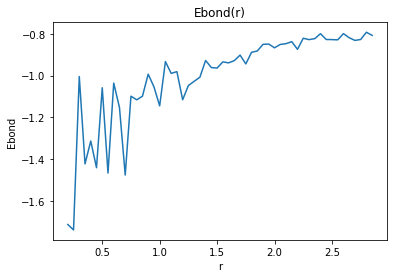

In [5]:
import collections

Ebond_sorted = collections.OrderedDict(sorted(Ebond.items()))
x_values = [] # radii
y_values = [] # Energy

for key, val in Ebond_sorted.items():
    x_values.append(float(key))
    y_values.append(val)

# plot Ebont(r)
plt.plot(x_values, y_values)
plt.xlabel('r')
plt.ylabel('Ebond')
plt.title('Ebond(r)')
plt.show()